In [20]:
!pip install --quiet optuna sklearn numpy matplotlib

In [21]:
import optuna
import numpy as np
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot as plt

In [22]:
def f (x,y):      
    return 2*(x**2)-1.05*(x**4)+((x**6)/6)+(x*y)+(y**2)

def gradf (x,y):
    return np.asarray([(x**5 - 4.2*x**3+4*x+y), (x+2*y)])

In [23]:
study = optuna.create_study()


[I 2022-11-02 10:38:54,421] A new study created in memory with name: no-name-20e53d15-1a76-4c85-a60f-ffd9d4eef850


In [24]:
def objective(trial):
    x = trial.suggest_float("x", -10, 10)
    y = trial.suggest_float("y", -10, 10)
    return f(x, y)

In [25]:
study.optimize(objective, n_trials=100)

[I 2022-11-02 10:38:54,454] Trial 0 finished with value: 2873.9871172501003 and parameters: {'x': -5.249182783868875, 'y': -9.05328885586722}. Best is trial 0 with value: 2873.9871172501003.
[I 2022-11-02 10:38:54,457] Trial 1 finished with value: 11039.502565122662 and parameters: {'x': 6.52454244321347, 'y': -6.504115053478429}. Best is trial 0 with value: 2873.9871172501003.
[I 2022-11-02 10:38:54,460] Trial 2 finished with value: 40822.16717046737 and parameters: {'x': 8.041392173378195, 'y': -9.922974609694279}. Best is trial 0 with value: 2873.9871172501003.
[I 2022-11-02 10:38:54,464] Trial 3 finished with value: 58881.8052547865 and parameters: {'x': 8.531501185814122, 'y': 2.6774448148054795}. Best is trial 0 with value: 2873.9871172501003.
[I 2022-11-02 10:38:54,469] Trial 4 finished with value: 4413.2131352731385 and parameters: {'x': -5.6329761549866415, 'y': -6.690214302767014}. Best is trial 0 with value: 2873.9871172501003.
[I 2022-11-02 10:38:54,472] Trial 5 finished wi

In [26]:
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]
print(f"Found x: {found_x}, Found y: {found_y}, Result: {f(found_x, found_y)}")

Found x: -0.07294736762678833, Found y: 0.11224974828530876, Result: 0.015024612085266792


In [27]:
def print2d(objective, solutions=[], cords=[0.0,0.0], r_min=-1.0, r_max=1.0, nopoint=False, levels=20):
    # define range for input
    bounds = np.asarray([[r_min, r_max], [r_min, r_max]])
    # sample input range uniformly at 0.1 increments
    xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
    yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
    # create a mesh from the axis
    x, y = meshgrid(xaxis, yaxis)
    # compute targets
    results = objective(x, y)
    # create a filled contour plot with 50 levels and jet color scheme
    ax = plt.contour(x, y, results, levels=levels, cmap='jet')
    plt.clabel(ax, fontsize=9, inline=1)
    if (nopoint == True):
        plt.scatter(cords[0],cords[1],c='red')
        #plt.plot(solutions[:, 0], solutions[:, 1], '-', color='r')
    # show the plot
    plt.show()

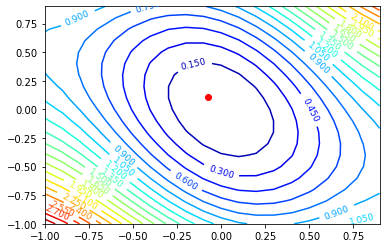

In [28]:
print2d(f,cords=[found_x,found_y],nopoint=True)